# Stats 21 Final Exam - Dec 15 2023

### Academic Integrity

This is a final exam. You are not allowed to communicate with other students during the exam. No collaboration allowed.

Sharing any portion of this exam, even after the course ends, is a violation of the UCLA code of conduct.

If you are not enrolled in Stats 21 during Fall 2023, using this file to study for Stats 21 is a violation of the UCLA code of conduct.

To acknowledge that you have read this, type your name in the following markdown box.

I have read the above statements. Your name: Ryan Liu

# Part 0 - Import Data

I found the following data from a weekly newsletter titled "Data is Plural." https://www.data-is-plural.com/archive/

You will work with a bit of silly, but perhaps fun data compiled by Alice Y. Liang. https://aliceyliang.com/ An article corresponding to her findings can be read here: https://pudding.cool/2023/10/romance-covers/

The data looks at covers of 1400+ romance novels published between 2011 and 2023. 

The data's variables include:

- book title
- author
- publisher
- publication date
- announcement year/season
- description
- ISBN
- urls of the cover image and thumbnails
- whether cover style is photorealistic or illustrated
- whether cover features a partially undressed man
- whether cover features a partially undressed woman
- whether it depicts at least one person of color

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
covers = pd.read_csv('romance_covers.csv')

In [81]:
covers.shape

(1435, 21)

In [82]:
covers.columns

Index(['year', 'season', 'season_order', 'title', 'author', 'publisher',
       'date', 'description', 'ISBN', 'Github permalink', 'google_thumbnail',
       'google_smallThumbnail', 'Cover URL override', 'cover_url',
       'Github thumbnail', 'Cover', 'Style', 'Man partially unclothed',
       'Woman partially unclothed', 'Has POC', 'Unnamed: 20'],
      dtype='object')

In [83]:
covers.head(10)

,year,season,season_order,title,author,publisher,date,description,ISBN,Github permalink,...,google_smallThumbnail,Cover URL override,cover_url,Github thumbnail,Cover,Style,Man partially unclothed,Woman partially unclothed,Has POC,Unnamed: 20
0,2011,Spring,1,Too Rich for a Bride,Mona Hodgson,Waterbrook,5/1/2011,NaN,9780307458926,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=S8dvD...,NaN,http://books.google.com/books/content?id=S8dvD...,NaN,NaN,Photorealistic,False,False,False,NaN
1,2011,Spring,1,Breaking the Rules,Suzanne Brockmann,Ballantine,4/1/2011,NaN,9780345521231,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=TPmrb...,NaN,http://books.google.com/books/content?id=TPmrb...,NaN,NaN,Photorealistic,False,False,False,NaN
2,2011,Spring,1,The Secret Mistress,Mary Balogh,Delacorte,7/3/2011,NaN,9780440245292,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=pyqy-...,NaN,http://books.google.com/books/content?id=pyqy-...,NaN,NaN,Photorealistic,False,False,False,NaN
3,2011,Spring,1,Born of Shadows,Sherrilyn Kenyon,Grand Central,5/1/2011,NaN,9780749954789,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=D_P7T...,NaN,http://books.google.com/books/content?id=D_P7T...,NaN,NaN,Photorealistic,False,False,False,NaN
4,2011,Spring,1,All Up in My Business,Lutishia Lovely,Kensington/Dafina,3/1/2011,NaN,9780758238702,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=_yoDA...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,Photorealistic,False,False,True,NaN
5,2011,Spring,1,"His, Unexpectedly",Susan Fox,Kensington/Brava,2/1/2011,NaN,9780758267818,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=t5rOK...,NaN,http://books.google.com/books/content?id=t5rOK...,NaN,NaN,Photorealistic,True,False,False,NaN
6,2011,Spring,1,Kiss of Snow,Nalini Singh,Berkley,6/1/2011,NaN,9781101528723,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=iNqqx...,NaN,http://books.google.com/books/content?id=iNqqx...,NaN,NaN,Photorealistic,True,False,False,NaN
7,2011,Spring,1,The Soldier,Grace Burrowes,Sourcebooks Casablanca,6/1/2011,NaN,9781402245695,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=bnXMX...,NaN,http://books.google.com/books/content?id=bnXMX...,NaN,NaN,Photorealistic,True,False,False,NaN
8,2011,Spring,1,Blood Stains,Sharon Sala,Mira,2/1/2011,NaN,9781426884306,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=5pLjN...,NaN,http://books.google.com/books/content?id=5pLjN...,NaN,NaN,Photorealistic,False,False,False,NaN
9,2011,Spring,1,A Turn in the Road,Debbie Macomber,Mira,5/1/2011,NaN,9781460398876,https://raw.githubusercontent.com/the-pudding/...,...,http://books.google.com/books/content?id=9Nr1D...,NaN,http://books.google.com/books/content?id=9Nr1D...,NaN,NaN,Photorealistic,False,False,False,NaN


## Part 1: Pandas

## Part 1A Exploration [25 pts]

- Q1 [5 pts] How many unique authors? A simple number is sufficient. 

    Some books have multiple authors. There is no need to parse them out as individual authors. For the purpose of this problem, "John Smith" vs "Jane Adams" vs "John Smith and Jane Adams" will count as three unique authors. You may treat each unique string in the 'author' column as a unique author.

In [84]:
print(len(pd.unique(covers['author'])))

929


- Q2 [5 pts] Who were the most prolific authors? Find the top 10 authors that wrote the most amount of books. There is a tie (for 9-16th place). Include everyone who is tied.

    Output should be a DataFrame or series with author names in order with the author with the most published books at the top. (I had Debbie Macomber with 13 books)

In [85]:
covers['author'].value_counts()[0:16]

author
Debbie Macomber     13
J.R. Ward           10
Grace Burrowes      10
Christina Lauren     9
Nora Roberts         9
Brenda Jackson       8
Eloisa James         8
Janet Dailey         8
Maya Banks           7
Susan Mallery        7
Julia London         7
Sabrina Jeffries     7
Adriana Herrera      7
Josi S. Kilpack      7
Alexis Hall          7
Mary Balogh          7
Name: count, dtype: int64

- Q3 [5 pts] Which publishers printed the most books? Find the publishers that published over 30 books.

    Output should be a DataFrame or series with publisher names in order with the publisher with the most published books at the top. (I had Sourcebooks Casablanca with 114 books)
    
    Similar to the author column, you may treat each unique string in the publisher column as a unique publisher.

In [86]:
covers['publisher'].value_counts()[covers['publisher'].value_counts() > 30]

publisher
Sourcebooks Casablanca    114
Avon                      100
Berkley                    83
HQN                        44
Forever                    44
Kensington                 43
Bold Strokes               40
Zebra                      36
Ballantine                 34
Mira                       33
Morrow                     32
St. Martin’s               32
Name: count, dtype: int64

- Q4 [5 pts] Many authors produce books with the same publisher. Some authors publish books with different publishers. Identify authors who had 5 or more different publishers.

    Output should be a DataFrame or series with author names in order with the author with the most number of publishers at the top. (I had Brenda Jackson with 8 publishers)

In [108]:
count = covers['publisher'].groupby(covers['author']).nunique().sort_values(ascending = False)
count[count >= 5]

author
Brenda Jackson        8
Alexis Hall           5
Julia London          5
Jude Deveraux         5
Priscilla Oliveras    5
Name: publisher, dtype: int64

- Q5 [5 pts] Create a barplot showing how many books were published in each season. Be sure spring comes before fall of each year.

    For instance, in spring 2011, there were 10 books published. Then in fall 2011, there were 47 books. Spring 2012 there were 59, etc.

In [113]:
x = covers.copy()
x['season'] = pd.Categorical(covers['season'], categories=['Spring', 'Fall'], ordered=True)
ans = x['season'].groupby(x['year']).value_counts().sort_index()

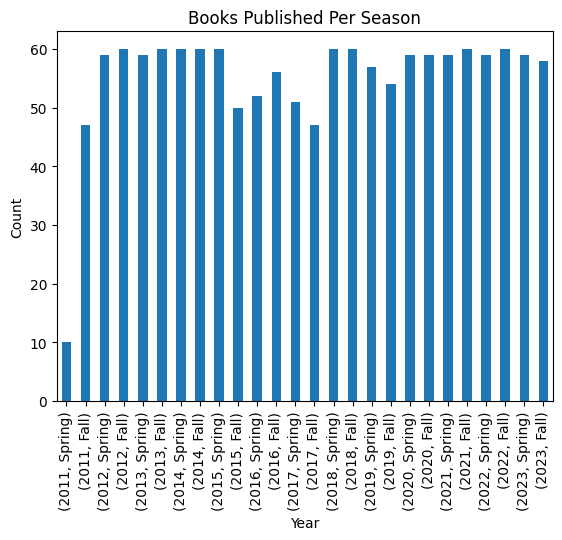

In [118]:
ax = ans.plot(kind = 'bar', stacked = False)
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Books Published Per Season')
plt.show()

## Part 1B: Cover Traits [35 pts]

- Q6 [5 pts] What proportion of book covers have a partial unclothed man? What proportion of book covers have a partial unclothed woman? simple numbers are sufficient.

In [96]:
men = len(covers[covers['Man partially unclothed'] == True])
women = len(covers[covers['Woman partially unclothed'] == True])
total = len(covers[['Man partially unclothed']])

In [99]:
print('Partial Unclothed Men: ', men/total)
print('Partial Unclothed Women: ', women/total)

Partial Unclothed Men:  0.14912891986062718
Partial Unclothed Women:  0.045993031358885016


- Q7 [10 pts] Create a stacked barplot showing the number of covers with fully clothed and partially unclothed men for each year. 

    Create another barplot showing the number of covers with fully clothed and partially unclothed women for each year.

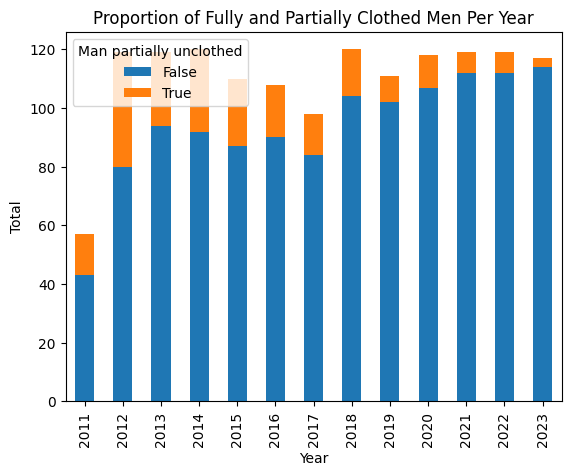

In [219]:
s = covers['Man partially unclothed'].groupby(covers['year']).value_counts().unstack().plot.bar(stacked = True)
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Proportion of Fully and Partially Clothed Men Per Year')
plt.show()

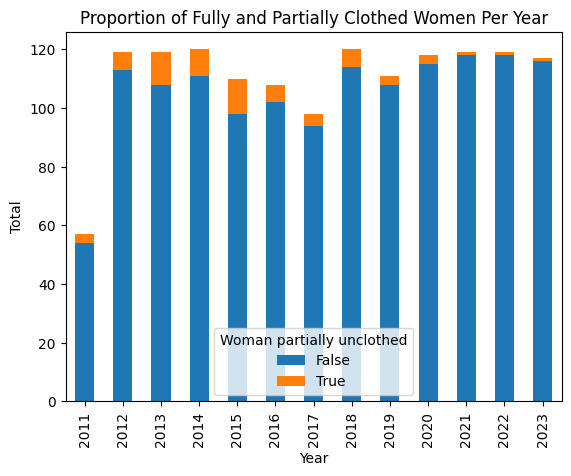

In [220]:
covers['Woman partially unclothed'].groupby(covers['year']).value_counts().unstack().plot.bar(stacked = True)
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Proportion of Fully and Partially Clothed Women Per Year')
plt.show()

- Q8 [10 pts] Print a table of authors who published more than 2 books and where over half of the covers have a partially undressed man. Print the table in descending order of proportion of covers with a partially undressed man. (At the top of my table I have Tessa Dare with 6 out of 6 books featuring a partially undressed man.) 

    Do the same, but for partially undressed woman.

    You may find it helpful to use the function `.agg()` in combination with `.groupby()`

    See the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html


In [237]:
men = covers.groupby('author').agg({'title':'count', 'Man partially unclothed':'sum'})
men['proportion'] = men['Man partially unclothed'] / men['title']
men = men.sort_values(['proportion', 'title'], ascending = [False, False])
men = men[men['title'] > 2]
men[men['proportion'] > 0.5]

,title,Man partially unclothed,proportion
author,,,
Tessa Dare,6,6,1.000000
Jane Ashford,3,3,1.000000
Beverly Jenkins,5,4,0.800000
Isabel Cooper,4,3,0.750000
Jackie Ashenden,3,2,0.666667
Lynsay Sands,3,2,0.666667
Gena Showalter,5,3,0.600000
Sophie Jordan,5,3,0.600000


In [238]:
w = covers.groupby('author').agg({'title':'count', 'Woman partially unclothed':'sum'})
w['proportion'] = w['Woman partially unclothed'] / w['title']
w = w.sort_values(['proportion', 'title'], ascending = [False, False])
w = w[w['title'] > 2]
w[w['proportion'] > 0.5]

,title,Woman partially unclothed,proportion
author,,,
Rachel Kramer Bussel,6,5,0.833333


- Q9 [10 pts] Identify publishers that frequently feature people of color on their covers. (Publishers where over half of the covers feature a person of color).

In [224]:
x = covers['Has POC'].groupby(covers['publisher']).value_counts().unstack().fillna(0).sort_values(by = True, ascending = False)
ratio = x[True] / (x[True] + x[False])
ratio[ratio.values > 0.5].sort_values(ascending = False)

publisher
Kensington/Dafina            1.000000
Kimani                       1.000000
Harlequin Presents           1.000000
Harlequin Kimani             1.000000
Harlequin Romance            1.000000
Harlequin Desire             1.000000
W by Wattpad                 1.000000
Strebor                      1.000000
Sideways                     1.000000
bold strokes                 1.000000
Dafina                       0.846154
Harlequin/Kimani             0.750000
Harlequin Special Edition    0.666667
Harlequin                    0.666667
Microcosm                    0.666667
Montlake                     0.571429
dtype: float64

## Part 2

### Function [20 pts]

Wordle is a word game where players try to guess a mystery 5-letter word. 

You can play it here: https://www.nytimes.com/games/wordle/index.html

In the real game, each guess the player makes must be a real 5-letter word. We will not check for this condition in our game.

When the player submits a word as a guess, Wordle provides feedback.

If a letter is in the word and in the correct position, print the letter surrounded with stars.

If a letter is in the word but in the incorrect spot, print the letter (with no stars).

If a letter is not in the word in any spot, output an underscore.

Example:

- mystery word: WEARY
- guess entry: WORDS
- output: '*W* _ R _ _'

Write a function `wordle(solution, guess)` that will give player information about the mystery word in accordance with the wordle rules.

The arguments are:

- `solution` the mystery word (could be lowercase or uppercase)
- `guess` the word the player submits as a guess (could be lowercase or uppercase)

The function should return the output as a string.

You only need to pass the test cases to get full credit.

- Q10 [20 pts]

In [189]:
def wordle(solution, guess):
    s = ''
    solution, guess = solution.upper(), guess.upper()
    for i in range(len(guess)):
        if guess[i] == solution[i]:
            s += f'*{guess[i]}* '
        elif guess[i] in solution:
            s += f'{guess[i]} '
        else:
            s += '_ '
    return s

In [190]:
mystery = "WEARY"

In [191]:
# test case do not modify
# output should be: '*W* _ R _ _'
wordle(mystery, "WORDS")

'*W* _ R _ _ '

In [192]:
# test case do not modify
# output should be: 'A _ _ E _'
wordle(mystery, "adieu")

'A _ _ E _ '

In [193]:
# test case do not modify
# output should be: '*W* *E* *A* *R* *Y*'
wordle(mystery, "weary")

'*W* *E* *A* *R* *Y* '

In [194]:
# test case do not modify
# output should be: 'E *L* *E* _ _'
wordle("sleep", "elect")

'E *L* *E* _ _ '

## Class Definition [20 pts]

Define a class, `Account`, which will be used to store a bank account.

The `Account` class will hold info:

- `name`: a string with the account holder's name
- `balance`: a float to  represent the money in the account.

The class should have the following behaviors:

- A new account for "Miles" with \$101.50 can be created with `Account('Miles', 101.5)`. If no name is provided, the default name should be 'anon', and the default starting balance should be 0.
- The string representation of the account is: `name's account. Balance: $x`. For example, `Miles's account. Balance: $101.50`. There should be two places after the decimal.
- Create a method `deposit(x)`. You may assume `x` will always be positive. It will deposit `x` dollars to the account. After depositing, it will print the new balance to the screen.
- Create a method `withdraw(x)`. You may assume `x` will always be positive. It will first check to see if the balance is at least as large as `x`. If the balance is less than `x`, it will raise a ValueError exception. If the balance is greater than `x`, it will deduct `x` dollars from the account and print the new balance to the screen.
- You should be able to compare one Account instance with another Account instance by comparing the dollar amounts in them.
- If you add one account with another account, it will combine the balances together. The name on the new account will be `name1 and name2`. For example:
    - `acct1 = Account("Miles", 101.5)`
    - `acct2 = Account("Krystal", 120)`
    - `acct3 = acct1 + acct2`. `print(acct3)` produces `Miles and Krystal's account. Balance: $221.50`


- Q11 [20 pts]

In [176]:
class Account:
    def __init__(self, name = 'anon', balance = 0):
        self.name = name
        self.balance = balance
    def __str__(self):
        return f"{self.name}'s account. Balance: ${self.balance:.2f}"
    def deposit(self, x):
        self.balance += x
        return self.balance
    def withdraw(self, x):
        if (self.balance - x) < 0:
            raise ValueError('Withdrawal Makes You Broke')
        else:
            self.balance -= x
        return self.balance
    def __lt__(self, other):
        return (self.balance < other.balance)
    def __add__(self, other):
        return Account(f'{self.name} and {other.name}', self.balance + other.balance)      

In [177]:
# test cases. do not modify
acct1 = Account("Miles", 101.5)

In [178]:
print(acct1)

Miles's account. Balance: $101.50


In [179]:
acct1.deposit(20)

121.5

In [180]:
acct1.withdraw(20)

101.5

In [181]:
acct1.withdraw(200)

ValueError: Withdrawal Makes You Broke

In [182]:
acct1.withdraw(0)

101.5

In [183]:
acct2 = Account("Krystal", 120)

In [184]:
print(acct2)

Krystal's account. Balance: $120.00


In [185]:
acct1 > acct2

False

In [186]:
acct1 < acct2

True

In [187]:
acct3 = acct1 + acct2

In [188]:
print(acct3)

Miles and Krystal's account. Balance: $221.50
